# 1. Import thư viện

In [1]:
import numpy as np
import cv2 as cv

In [2]:
from google.colab.patches import cv2_imshow

# 2. Nhập thông tin chia sẻ

In [3]:
N = input('Nhập tổng số người shares(N) : ')
N = int(N)
print("Tổng số người shares (N) = ", N)
K = input("Nhập tổng số chia sẻ cần thiết để lây lại hình ảnh bí mật (K) :")
K = int(K)
print("Số lượng chia sẻ cần thiết để lấy lại bí mật (K) = ", K)

Nhập tổng số người shares(N) : 3
Tổng số người shares (N) =  3
Nhập tổng số chia sẻ cần thiết để lây lại hình ảnh bí mật (K) :2
Số lượng chia sẻ cần thiết để lấy lại bí mật (K) =  2


# 3. Thông tin ảnh đưa vào

In [4]:
# Hàm đọc ảnh bí mật
def read_image(img_name):
    img = cv.imread(img_name)
    print("kích thước ảnh bí mật = ", img.shape)
    resized_img = cv.resize(img, (500,500))
    cv2_imshow(resized_img)
    #cv.imshow("Hình ảnh bí mật",resized_img)
    cv.waitKey(0)
    return img


Enter the name of the image (with extension):/content/test1.jpeg
kích thước ảnh bí mật =  (256, 256, 3)


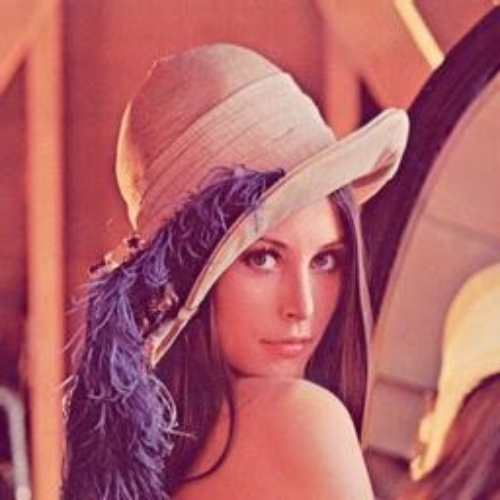

In [5]:
image_name = input("Enter the name of the image (with extension):")
image = read_image(image_name)

# 4. Các bước chia sẻ ảnh

## B1. Tạo khoá ngẫu nhiên


In [6]:
dealer_key = np.zeros(image.shape).astype(int)
dealer_key

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [7]:
dealer_key.shape

(256, 256, 3)

In [8]:
print(len(dealer_key))
print(len(dealer_key[0]))
print(len(dealer_key[0][0]))

256
256
3


In [9]:
# Hàm tạo khoá ngẫu nhiên
def generateRandomKey(key_shape):
    dealer_key = np.zeros(key_shape).astype(int)
    for i in range(0, len(dealer_key)):
        for j in range(0, len(dealer_key[i])):
            for k in range(0, 3):
                dealer_key[i][j][k] = (np.random.randint(0,255))
    return dealer_key

In [10]:
random_key = generateRandomKey(image.shape)
print("kích thước khoá ngẫu nhiên = ", random_key.shape)

kích thước khoá ngẫu nhiên =  (256, 256, 3)


In [11]:
random_key

array([[[ 26, 119, 149],
        [ 26, 237, 165],
        [ 10,  34, 200],
        ...,
        [ 69,   8,  92],
        [ 88, 114,  70],
        [220, 154,  73]],

       [[ 63,  36, 109],
        [ 21,  31, 102],
        [126,  24,  43],
        ...,
        [116,   5, 186],
        [ 74,  53,  46],
        [  6, 194, 208]],

       [[120, 204,  85],
        [124, 217, 210],
        [ 41,   0, 229],
        ...,
        [205, 202,  66],
        [230,  52, 230],
        [ 89, 141,  56]],

       ...,

       [[123, 153,  45],
        [252,  15,  62],
        [ 59,  79,   6],
        ...,
        [190, 119, 176],
        [210, 104, 102],
        [159,  88,  83]],

       [[236, 207,  35],
        [ 52, 110, 160],
        [ 78, 175,  57],
        ...,
        [ 22,  40, 197],
        [201, 106,  38],
        [187,  73,  61]],

       [[ 43,   9, 198],
        [ 94,  80, 205],
        [ 22,  12, 197],
        ...,
        [234,  86, 240],
        [149, 205,  79],
        [217, 140, 213]]

## B2. Mã hoá hình ảnh

Dưới đây là bảng chân trị của phép XOR:

| A | B | A XOR B |
|---|---|---------|
| 0 | 0 |   0     |
| 0 | 1 |   1     |
| 1 | 0 |   1     |
| 1 | 1 |   0     |

In [12]:
# Hàm chuyển đổi hình ảnh bí mật thành hình ảnh được mã hóa
def convertToEncryptedImage(im, rand_key):
    print("Chuyển đổi sang hình ảnh được mã hóa...")
    encrypted_im = np.zeros(im.shape).astype(int)

    for i in range(0, len(rand_key)):
        for j in range(0, len(rand_key[i])):
            for k in range(0, 3):
                encrypted_im[i][j][k] = im[i][j][k]^rand_key[i][j][k]

    return encrypted_im

In [13]:
encrypted_image = convertToEncryptedImage(image, random_key)
print("Hình dạng của hình ảnh được mã hóa = ", encrypted_image.shape)

Chuyển đổi sang hình ảnh được mã hóa...
Hình dạng của hình ảnh được mã hóa =  (256, 256, 3)


In [14]:
encrypted_image

array([[[110, 241, 118],
        [110, 107,  70],
        [126, 164,  43],
        ...,
        [199, 129, 186],
        [216, 250, 164],
        [175, 231, 156]],

       [[ 76, 161, 143],
        [102, 154, 132],
        [ 13, 157, 201],
        ...,
        [224, 146,  72],
        [216, 163, 193],
        [115, 190,   3]],

       [[  8,  73, 180],
        [ 12,  92,  51],
        [ 89, 133,   4],
        ...,
        [183, 188, 141],
        [136,  95,  39],
        [ 11, 194, 156]],

       ...,

       [[ 59, 143, 122],
        [185,  20,  98],
        [124,  81, 100],
        ...,
        [242,  69,  54],
        [135,  86, 245],
        [196,  30, 200]],

       [[172, 217, 116],
        [112, 116, 251],
        [ 10, 180, 102],
        ...,
        [ 64,  21,  86],
        [146,  47, 187],
        [229,   2, 159]],

       [[107,  31, 145],
        [ 31,  73, 151],
        [ 84,  21, 152],
        ...,
        [177,  18, 105],
        [202, 132, 237],
        [134, 199, 113]]

## B3. Tạo id cho mỗi người tham gia


In [15]:
# Chức năng tạo id duy nhất cho mỗi người tham gia
def getUniqueIds(n):
    temp_arr = np.zeros(n).astype(int)
    for i in range(n):
        temp_arr[i] = np.random.randint(0,255)
    return temp_arr

In [16]:
unique_ids = getUniqueIds(N)
print("ID duy nhất của tất cả những người tham gia N là :")
print(unique_ids)

ID duy nhất của tất cả những người tham gia N là :
[213 137 208]


## B4. Mã hoá các ID cho người dùng
Chuyển đổi ID duy nhất thứ i thành dạng nhị phân 8 bit và chia thành hai phần: `msb (4 bit đầu) và lsb (4 bit cuối).`
Đưa 4 bit của msb vào 4 vị trí đầu tiên của mảng x.
Đưa kết quả của phép `XOR` giữa msb và lsb vào 4 vị trí cuối cùng của mảng x.
Chuyển đổi mảng x từ dạng nhị phân về dạng số nguyên và thêm vào mảng temp_arr.
Cuối cùng, hàm trả về mảng temp_arr chứa các ID đã được mã hóa.


In [17]:
# Hàm nhận id được mã hóa cho mỗi người tham gia
def getEncryptedIds(unique_ids, n):
    temp_arr = []
    for i in range(n):
        x = np.zeros(8).astype(int)
        s = '{0:08b}'.format(unique_ids[i])
        msb = s[0:4]
        lsb = s[4:8]
        for i in range(4):
            x[i] = int(msb[i])
        for i in range(4):
            x[i+4] = int(msb[i])^int(lsb[i])
        res = int("".join(str(l) for l in x), 2)
        temp_arr.append(res)

    return temp_arr

In [19]:
encrypted_ids = getEncryptedIds(unique_ids, N)
print("ID duy nhất của tất cả những người tham gia N là :")
print(unique_ids)
print("Các id được mã hóa là : ")
print(encrypted_ids)


ID duy nhất của tất cả những người tham gia N là :
[213 137 208]
Các id được mã hóa là : 
[216, 129, 221]


## B5. Tạo ảnh xác thực `R1` và phần dư `R1_remainder`

In [20]:
#  Hàm lấy hình ảnh xác thực cho mỗi người tham gia (R1)
def getR1(en_image, sh):
    R1 = np.zeros(en_image.shape).astype(int)
    R1_remainder = np.zeros(en_image.shape).astype(int)

    for i in range(0, len(R1)):
        for j in range(0, len(R1[i])):
            for k in range(0, 3):
                R1[i][j][k] = int(en_image[i][j][k]//int(sh))
                R1_remainder[i][j][k] = en_image[i][j][k]%int(sh)

    return [R1, R1_remainder]

In [21]:
authenticated_image = getR1(encrypted_image, K) # array of R1 and R1_remainder
print(authenticated_image[0].shape, authenticated_image[1].shape)

(256, 256, 3) (256, 256, 3)


In [22]:
authenticated_image[0]

array([[[ 55, 120,  59],
        [ 55,  53,  35],
        [ 63,  82,  21],
        ...,
        [ 99,  64,  93],
        [108, 125,  82],
        [ 87, 115,  78]],

       [[ 38,  80,  71],
        [ 51,  77,  66],
        [  6,  78, 100],
        ...,
        [112,  73,  36],
        [108,  81,  96],
        [ 57,  95,   1]],

       [[  4,  36,  90],
        [  6,  46,  25],
        [ 44,  66,   2],
        ...,
        [ 91,  94,  70],
        [ 68,  47,  19],
        [  5,  97,  78]],

       ...,

       [[ 29,  71,  61],
        [ 92,  10,  49],
        [ 62,  40,  50],
        ...,
        [121,  34,  27],
        [ 67,  43, 122],
        [ 98,  15, 100]],

       [[ 86, 108,  58],
        [ 56,  58, 125],
        [  5,  90,  51],
        ...,
        [ 32,  10,  43],
        [ 73,  23,  93],
        [114,   1,  79]],

       [[ 53,  15,  72],
        [ 15,  36,  75],
        [ 42,  10,  76],
        ...,
        [ 88,   9,  52],
        [101,  66, 118],
        [ 67,  99,  56]]

In [23]:
authenticated_image[1]

array([[[0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        ...,
        [1, 1, 0],
        [0, 0, 0],
        [1, 1, 0]],

       [[0, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 1, 1],
        [1, 0, 1]],

       [[0, 1, 0],
        [0, 0, 1],
        [1, 1, 0],
        ...,
        [1, 0, 1],
        [0, 1, 1],
        [1, 0, 0]],

       ...,

       [[1, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [1, 0, 1],
        [0, 0, 0]],

       [[0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        ...,
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [0, 1, 0],
        ...,
        [1, 0, 1],
        [0, 0, 1],
        [0, 1, 1]]])

## B6. Hàm Xoay trái 1 chuỗi nhị phân `8bit`

In [24]:
# Xoay tròn trái của một mảng str -> xa lần
def leftRotate(bit_8_s, xa):
    temp_str = []
    for i in range(xa):
        temp_str.append(bit_8_s[i])
    check_point = 0
    for i in range(0, len(bit_8_s)-xa):
        bit_8_s[i] = bit_8_s[i+xa]
        check_point = i
    for i in range(0,xa):
        bit_8_s[check_point+1+i] = temp_str[i]
    return bit_8_s

## B7. Thực hiện phép xoay trái trên hình ảnh
hàm trả về hình ảnh `temporary_R1` sau khi đã được dịch chuyển.


In [25]:
#Chức năng thực hiện dịch chuyển tròn trái
def leftCircularShift(R_x, e_x):
    temporary_R1 = np.zeros(R_x.shape).astype(int)
    for i in range(0, len(temporary_R1)):
        for j in range(0, len(temporary_R1[i])):
            for k in range(0, 3):
                s = '{0:08b}'.format(R_x[i][j][k])
                tempo = np.zeros(8).astype(int)
                for l in range(8):
                    tempo[l] = int(s[l])
                e_enx = e_x%8
                tempo = leftRotate(tempo, e_enx)
                if(i==0 and j==0 and k==0):
                  print(tempo)
                res = int("".join(str(l) for l in tempo), 2)
                temporary_R1[i][j][k] = res
    return temporary_R1


## B8. Tạo ra n chia sẻ bằng hình ảnh xác thực R1 và mã id đã mã hoá

In [26]:
#tạo ta N shares
def generate_N_shares(Rg, n, n_ids):
    S = []
    for i in range(0,n):
        temp_g = Rg
        tempo_S = leftCircularShift(temp_g, n_ids[i])
        S.append(tempo_S)
    return S

In [27]:
encrypted_ids

[216, 129, 221]

In [28]:
h1 = authenticated_image[0]
shares = generate_N_shares(h1, N, encrypted_ids)

[0 0 1 1 0 1 1 1]
[0 1 1 0 1 1 1 0]
[1 1 1 0 0 1 1 0]


## B9. lưu ảnh chia sẻ

In [29]:
# lưu k hình đã chia sẻ đầu tiên hoăc có thể lưu hết N hình
def saveKshares(S, n):
    for i in range(0, n):
        filename = "share_"+str(i+1)+".png"
        cv.imwrite(filename, S[i])
        #resized_img = cv.resize(S[i], (500,500))
        #cv2_imshow(S[i])
saveKshares(shares, N)

Share 1


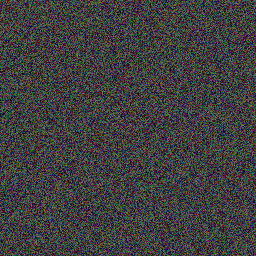

Share 2


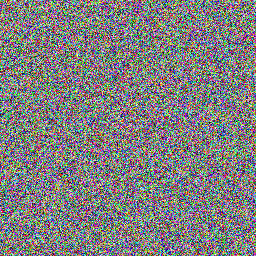

Share 3


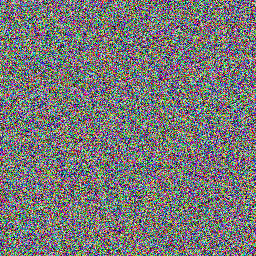

In [30]:
def displayImages(S):
    for i in range(len(S)):
        print('Share '+str(i+1))
        cv2_imshow(S[i])
        cv.waitKey(0)
        cv.destroyAllWindows()

displayImages(shares)


## B10. Hàm xoay phải 1 chuỗi `8bit`

In [31]:
# Xoay tròn phải của 1 str -> xa times
def rightRotate(bit_8_s, xa):
    temp_str = []
    for i in range(len(bit_8_s)-xa,len(bit_8_s)):
        temp_str.append(bit_8_s[i])
    for i in range(len(bit_8_s)-1, xa-1, -1):
        bit_8_s[i] = bit_8_s[i-xa]
    for i in range(0,xa):
        bit_8_s[i] = temp_str[i]
    return bit_8_s

## B11. Thực hiện xoay phải từng pixel trong từng ảnh

In [32]:
#Dịch chuyển tròn bển phải
def rightCircularShift(R_x, e_x):
    tempo_R_x = np.zeros(R_x.shape).astype(int)
    for i in range(0, len(tempo_R_x)):
        for j in range(0, len(tempo_R_x[i])):
            for k in range(0, 3):
                s = '{0:08b}'.format(R_x[i][j][k])
                tempo = np.zeros(8).astype(int)
                for l in range(8):
                    tempo[l] = int(s[l])
                e_x_r = e_x%8
                tempo_r = rightRotate(tempo, e_x_r)
                if(i==0 and j==0 and k==0):
                  print(tempo_r)
                res = int("".join(str(l) for l in tempo_r), 2)
                tempo_R_x[i][j][k] = res

    return tempo_R_x

## B12. Thực hiện phục hồi từ K  ảnh cần khôi phục ta được ảnh Xác thực R1 ban đầu

In [33]:

# Phục hồi K shares
def retreive_k_shares(S, k, encrypted_ids):
    R = []
    for i in range(0,k):
        temp = S[i]
        temp_S = rightCircularShift(temp, encrypted_ids[i])
        R.append(temp_S)
    return R

In [35]:
retreived_shares = retreive_k_shares(shares, K, encrypted_ids)

[0 0 1 1 0 1 1 1]
[0 0 1 1 0 1 1 1]


In [37]:
retreived_shares[0]

array([[[ 55, 120,  59],
        [ 55,  53,  35],
        [ 63,  82,  21],
        ...,
        [ 99,  64,  93],
        [108, 125,  82],
        [ 87, 115,  78]],

       [[ 38,  80,  71],
        [ 51,  77,  66],
        [  6,  78, 100],
        ...,
        [112,  73,  36],
        [108,  81,  96],
        [ 57,  95,   1]],

       [[  4,  36,  90],
        [  6,  46,  25],
        [ 44,  66,   2],
        ...,
        [ 91,  94,  70],
        [ 68,  47,  19],
        [  5,  97,  78]],

       ...,

       [[ 29,  71,  61],
        [ 92,  10,  49],
        [ 62,  40,  50],
        ...,
        [121,  34,  27],
        [ 67,  43, 122],
        [ 98,  15, 100]],

       [[ 86, 108,  58],
        [ 56,  58, 125],
        [  5,  90,  51],
        ...,
        [ 32,  10,  43],
        [ 73,  23,  93],
        [114,   1,  79]],

       [[ 53,  15,  72],
        [ 15,  36,  75],
        [ 42,  10,  76],
        ...,
        [ 88,   9,  52],
        [101,  66, 118],
        [ 67,  99,  56]]

### >>>>> nhận xét ảnh giống nhau

## B13. Khôi phục ảnh gốc từ K ảnh

In [38]:
# phục hồi ảnh bí mật
def getSecretImage(retreived_shares, k, r_shape, rem, key, org_img, org_share, final_image):
    ret = np.zeros(r_shape).astype(int)
    for l in range(k):
        for i in range(len(retreived_shares[l])):
            for j in range(len(retreived_shares[l][i])):
                for t in range(3):
                    ret[i][j][t] += retreived_shares[l][i][j][t]

    for i in range(len(ret)):
            for j in range(len(ret[i])):
                for t in range(3):
                    ret[i][j][t] = ret[i][j][t] + rem[i][j][t]

    secret_image = np.zeros(r_shape).astype(int)
    for i in range(len(ret)):
            for j in range(len(ret[i])):
                for t in range(3):
                    temp_xor = ret[i][j][t]^key[i][j][t]
                    secret_image[i][j][t] = temp_xor

    fileName = "retreived_image.jpg"
    cv.imwrite(fileName, secret_image)

In [39]:
getSecretImage(retreived_shares, K, image.shape, authenticated_image[1], random_key, encrypted_image, authenticated_image[0], image)